# Lamat 2024 Winter Bootcamp

Some of this material was adapted from the Lamat 2023 Winter Bootcamp by Jules Fowler and Anne Dattilo.

### Astropy

Astropy is an Python library for all your astrophysical needs! These may include:

- dealing with astronomical coordinate systems
- handling physical quantities and units
- using standard astronomical methods/statistical techniques
- loading and saving files with astronomical data
- and more!

There's a lot you can do with astropy, and I'd recommend checking out their own tutorials at https://learn.astropy.org/ to see what might be relevant for you. I'm going to cover the two aspects of astropy I end up using the most: their units and constants system, and FITS files.

In [1]:
import astropy
import numpy as np

### Astropy Units and Constants

It's really common for unit issues to give people the wrong answer in scientific computing, because it's often hard to keep track of what units everything's supposed to have in your head, and if you get one wrong it's hard to track it down. To remedy that, astropy provides a set of objects under `astropy.units` representing common units.

In [2]:
import astropy.units as u
u.m

Unit("m")

These are a special type that's specific to astropy:

In [3]:
type(u.m), type(u.erg)

(astropy.units.core.IrreducibleUnit, astropy.units.core.Unit)

And there's a lot of them:

In [4]:
u.s, u.cm, u.K, u.J, u.AU, u.pc

(Unit("s"), Unit("cm"), Unit("K"), Unit("J"), Unit("AU"), Unit("pc"))

If you want to see what one of them is (it's often hard to parse just off the abbreviation), you can either look up the documentation on the astropy website or access it using `help`:

In [5]:
help(u.J)

Help on Unit in module astropy.units.core:

Unit("J")
    Joule: energy



You can turn a number (float) into a `Quantity` object by multiplying a unit:

In [6]:
d = 1.0 * u.m
d

<Quantity 1. m>

In [7]:
type(d)

astropy.units.quantity.Quantity

These units work by only letting you do operations that make sense. For example, you can add together meters and meters:

In [8]:
1 * u.m + 2 * u.m

<Quantity 3. m>

Or different units of length:

In [9]:
1 * u.m + 50 * u.cm

<Quantity 1.5 m>

In [10]:
1000 * u.AU + 0.001 * u.pc

<Quantity 1206.26480625 AU>

In [11]:
help(u.pc)

Help on Unit in module astropy.units.core:

Unit("pc")
    parsec: approximately 3.26 light-years.



And you can multiply anything:

In [12]:
2 * u.J + 2 * u.kg * u.m ** 2 / u.s ** 2

<Quantity 4. J>

In [13]:
(2 * u.kg * u.m ** 2 / u.s ** 2 + 2 * u.J).to(u.erg)

<Quantity 40000000. erg>

But you can't add different things together:

In [14]:
1 * u.m + 2 * u.g

UnitConversionError: Can only apply 'add' function to quantities with compatible dimensions

Or do certain operations, like exp and log, on numbers with units:

In [15]:
np.exp(1 * u.m)

UnitTypeError: Can only apply 'exp' function to dimensionless quantities

In [16]:
distance = 3 * u.m
np.log10(distance / u.m)

<Quantity 0.47712125>

But if you divide out all units, you can do these:

In [17]:
np.exp(1 * u.m / (50 * u.cm))

<Quantity 7.3890561>

Together with this, we also have some standard constants in `astropy.constants`.

In [18]:
import astropy.constants as c

In [19]:
c.h

<<class 'astropy.constants.codata2018.CODATA2018'> name='Planck constant' value=6.62607015e-34 uncertainty=0.0 unit='J s' reference='CODATA 2018'>

In [20]:
c.GM_earth

<<class 'astropy.constants.iau2015.IAU2015'> name='Nominal Earth mass parameter' value=398600400000000.0 uncertainty=0.0 unit='m3 / s2' reference='IAU 2015 Resolution B 3'>

In [21]:
help(c)

Help on package astropy.constants in astropy:

NAME
    astropy.constants

DESCRIPTION
    Contains astronomical and physical constants for use in Astropy or other
    places.

    A typical use case might be::

        >>> from astropy.constants import c, m_e
        >>> # ... define the mass of something you want the rest energy of as m ...
        >>> m = m_e
        >>> E = m * c**2
        >>> E.to('MeV')  # doctest: +FLOAT_CMP
        <Quantity 0.510998927603161 MeV>

    The following constants are available:

    ========== ============== ================ =========================
       Name        Value            Unit       Description
    ========== ============== ================ =========================
        G        6.6743e-11     m3 / (kg s2)   Gravitational constant
       N_A     6.02214076e+23    1 / (mol)     Avogadro's number
        R        8.31446262     J / (K mol)    Gas constant
       Ryd       10973731.6       1 / (m)      Rydberg constant
        a0   

In [22]:
(c.h * c.c / (2.82 * c.k_B * 6600 * u.K)).to(u.nm)

<Quantity 773.03722196 nm>

**Exercise**: Using the units and constants system, write a function that computes the escape velocity $v = \sqrt{\frac{2GM}{R}}$ of a body with mass $M$ and radius $R$ in units of (divided by) the Earth's escape velocity. Looking at the astropy units documentation at https://docs.astropy.org/en/stable/units/index.html, see if you can find a way to make sure it throws an error if you don't pass in a mass and a radius.

In [23]:
c.R_earth

<<class 'astropy.constants.iau2015.IAU2015'> name='Nominal Earth equatorial radius' value=6378100.0 uncertainty=0.0 unit='m' reference='IAU 2015 Resolution B 3'>

In [24]:
def escape_velocity(M, R):
    # your code here!
    pass

In [25]:
escape_velocity(c.M_jup, c.R_jup) # this should be about 5.3

In [27]:
escape_velocity(c.R_jup, c.M_jup) # this shouldn't work

### FITS Files

(credit to Anne Dattilo for most of this section)

A FITS (Flexible Image Transport System) file is a file type that can store multiple types of data. In astronomy, you'll often see it contain image data or data tables (or both!). This is the primary way observational data is stored.

In this tutorial, we will:

- Download data
- Open FITS files and access data
- Edit FITS headers
- Plot FITS images

There are several ways to do each of these things, so feel free to look at the documentation to see other methods!

In [28]:
from astropy.io import fits
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm, AsinhNorm, PowerNorm
from astropy.visualization import ZScaleInterval

`astropy` has a public data set we will be using to play around with FITS images.

In [29]:
from astropy.utils.data import download_file

image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True)

In [30]:
image_file

'/home/jovyan/.astropy/cache/download/url/ff6e0b93871033c68022ca026a956d87/contents'

In [31]:
type(image_file)

str

`astropy.fits` has two primary ways of opening FITS files.

The first is `fits.open()`.

This opens the file in a readonly mode and returns an HDU (**H**eader **D**ata **U**nit).

In [32]:
hdu_list = fits.open(image_file)
hdu_list.info()

Filename: /home/jovyan/.astropy/cache/download/url/ff6e0b93871033c68022ca026a956d87/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


`hdu_list.info()` returns an `HDUList` object that gives us information about what's in the FITS file. It acts as a list where we can access each entry like a Python list.

It looks like there's data in the `PRIMARY` extension (`hdu_list[0]`) as well as a Table (`hdu_list[1]`). Let's use the next few cells to inspect the data.

In [33]:
hdu_list[0].data

array([[ 7201,  6642,  6642, ...,  9498,  9498, 10057],
       [ 6642,  6363,  6642, ..., 10057, 10616, 10616],
       [ 6922,  6642,  6922, ..., 10337, 11175, 10616],
       ...,
       [ 5412,  5132,  5412, ..., 13000, 12580, 12021],
       [ 5796,  5517,  5796, ..., 12546, 12546, 11987],
       [ 5796,  5796,  6076, ..., 11987, 12546, 12546]], dtype='>i2')

In [34]:
hdu_list[0].data.astype(float) * 3

array([[21603., 19926., 19926., ..., 28494., 28494., 30171.],
       [19926., 19089., 19926., ..., 30171., 31848., 31848.],
       [20766., 19926., 20766., ..., 31011., 33525., 31848.],
       ...,
       [16236., 15396., 16236., ..., 39000., 37740., 36063.],
       [17388., 16551., 17388., ..., 37638., 37638., 35961.],
       [17388., 17388., 18228., ..., 35961., 37638., 37638.]])

In [35]:
# what's the shape of the PrimaryHDU?
hdu_list[0].data.shape

# what is the type of the PrimaryHDU?

(893, 891)

In [36]:
hdu_list.info()

Filename: /home/jovyan/.astropy/cache/download/url/ff6e0b93871033c68022ca026a956d87/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [37]:

hdu_list[1].data['ETA']

# what is the type of the TableHDU?

array([-3.12, -3.12, -3.12, ...,  3.12,  3.12,  3.12])

In [38]:
hdu_list[1].data['ETA'].shape

(1600,)

No matter what you do, if you use `fits.open()` you MUST close your file!!!!!!!!!!!!!

In [39]:
hdu_list.close()

In [40]:
hdu_list[0].data

ValueError: I/O operation on closed file

You can access data via HDULists, but I find them slightly confusing. Lucky for us, `astropy.fits` has a direct method of getting your data. This is especially useful if you know what to expect in your file!

In [41]:
help(fits.getdata)

Help on function getdata in module astropy.io.fits.convenience:

getdata(filename, *args, header=None, lower=None, upper=None, view=None, **kwargs)
    Get the data from an HDU of a FITS file (and optionally the
    header).

    Parameters
    ----------
    filename : path-like or file-like
        File to get data from.  If opened, mode must be one of the
        following rb, rb+, or ab+.

    ext
        The rest of the arguments are for HDU specification.
        They are flexible and are best illustrated by examples.

        No extra arguments implies the primary HDU::

            getdata('in.fits')

        .. note::
            Exclusive to ``getdata``: if ``ext`` is not specified
            and primary header contains no data, ``getdata`` attempts
            to retrieve data from first extension HDU.

        By HDU number::

            getdata('in.fits', 0)      # the primary HDU
            getdata('in.fits', 2)      # the second extension HDU
            getdata('in.f

In [42]:
image_file

'/home/jovyan/.astropy/cache/download/url/ff6e0b93871033c68022ca026a956d87/contents'

In [43]:
data = fits.getdata(image_file)

In [44]:
data

array([[ 7201,  6642,  6642, ...,  9498,  9498, 10057],
       [ 6642,  6363,  6642, ..., 10057, 10616, 10616],
       [ 6922,  6642,  6922, ..., 10337, 11175, 10616],
       ...,
       [ 5412,  5132,  5412, ..., 13000, 12580, 12021],
       [ 5796,  5517,  5796, ..., 12546, 12546, 11987],
       [ 5796,  5796,  6076, ..., 11987, 12546, 12546]], dtype='>i2')

In [45]:
data, header = fits.getdata(image_file, header=True)

In [46]:
data

array([[ 7201,  6642,  6642, ...,  9498,  9498, 10057],
       [ 6642,  6363,  6642, ..., 10057, 10616, 10616],
       [ 6922,  6642,  6922, ..., 10337, 11175, 10616],
       ...,
       [ 5412,  5132,  5412, ..., 13000, 12580, 12021],
       [ 5796,  5517,  5796, ..., 12546, 12546, 11987],
       [ 5796,  5796,  6076, ..., 11987, 12546, 12546]], dtype='>i2')

In [47]:
header["OBJECT"]

'data'

In [48]:
type(header)

astropy.io.fits.header.Header

The Header Object gives you all the information about the file. In this case, it's giving you observing data for when and where it was taken, as well as much more. This is useful if you need to know the exact time the image was taken, or what filter it was in.

Header objects act like dictionaries, which mean we can ask for different keyword values.

In [49]:
67.2 * 355 / 3600

6.626666666666667

In [50]:
header

SIMPLE  =                    T /FITS: Compliance                                
BITPIX  =                   16 /FITS: I*2 Data                                  
NAXIS   =                    2 /FITS: 2-D Image Data                            
NAXIS1  =                  891 /FITS: X Dimension                               
NAXIS2  =                  893 /FITS: Y Dimension                               
EXTEND  =                    T /FITS: File can contain extensions               
DATE    = '2014-01-09        '  /FITS: Creation Date                            
ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                
SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                
REGION  = 'ER768   '           /GSSS: Region Name                               
PLATEID = 'A0JP    '           /GSSS: Plate ID                                  
SCANNUM = '01      '           /GSSS: Scan Number                               
DSCNDNUM= '00      '        

In [51]:
header["OBJECT"]

'data'

In [52]:
header['OBJECT'] = "Horsehead Nebula"

In [53]:
header["OBJECT"]

'Horsehead Nebula'

In [54]:
# you can also change the comment at the same time
header["OBSERVER"] = ("Williamina Fleming", "Observation: she did it")

header

SIMPLE  =                    T /FITS: Compliance                                
BITPIX  =                   16 /FITS: I*2 Data                                  
NAXIS   =                    2 /FITS: 2-D Image Data                            
NAXIS1  =                  891 /FITS: X Dimension                               
NAXIS2  =                  893 /FITS: Y Dimension                               
EXTEND  =                    T /FITS: File can contain extensions               
DATE    = '2014-01-09        '  /FITS: Creation Date                            
ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                
SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                
REGION  = 'ER768   '           /GSSS: Region Name                               
PLATEID = 'A0JP    '           /GSSS: Plate ID                                  
SCANNUM = '01      '           /GSSS: Scan Number                               
DSCNDNUM= '00      '        

In [55]:
header["OBSERVER"]

'Williamina Fleming'

We can save these changes:

In [56]:
fits.writeto('output_file.fits', data, header, overwrite=True)

Finally, let's look at the actual data.

In [57]:
data

array([[ 7201,  6642,  6642, ...,  9498,  9498, 10057],
       [ 6642,  6363,  6642, ..., 10057, 10616, 10616],
       [ 6922,  6642,  6922, ..., 10337, 11175, 10616],
       ...,
       [ 5412,  5132,  5412, ..., 13000, 12580, 12021],
       [ 5796,  5517,  5796, ..., 12546, 12546, 11987],
       [ 5796,  5796,  6076, ..., 11987, 12546, 12546]], dtype='>i2')

In [58]:
type(data)

numpy.ndarray

Awesome! It's just a numpy array, which means we can treat it like any other data we use. Let's get to the good stuff and look at it!

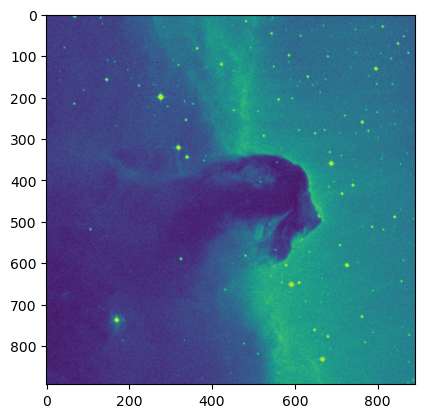

In [59]:
plt.imshow(data)

### Working with Image Data

Last time, we looked at `plt.imshow` in general, but didn't have any way to get data to show. Now that we're comfortable with FITS files, let's see what this image looks like!

Often, it's hard to see astronomical images if you're just plotting pixel intensities, so it's usually good to change the scale or normalization. In `plt.imshow`, we can either set the `vmin` and `vmax` parameters, or the `norm`. In addition to the ones built into matplotlib, `astropy.visualization` has some good methods for this; I like their `ZScaleInterval`, which matches the z-scaling from the plotting tool `ds9`.

In [64]:
ngc_data = fits.getdata("data/ngc_b0.fits")

In [66]:
vmin, vmax = ZScaleInterval().get_limits(ngc_data)
vmin, vmax # this gets a good min and max to use in imshow

(np.uint16(776), np.float64(948.2910634914691))

Text(0.5, 1.0, 'NGC 6819 field image')

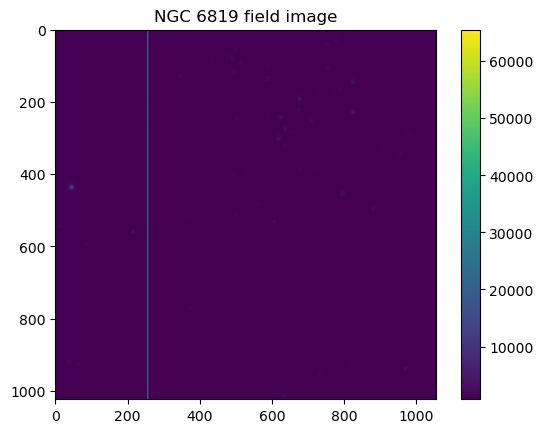

In [70]:
# your code here - call `imshow` on `ngc_data`

In [71]:
# creating fun test data for images
sd_x, sd_y = 5, 5 # try varying these!
grid_size = 10
r = np.arange(-grid_size // 2, grid_size // 2 + grid_size/100, step=grid_size/100)
xg, yg = np.meshgrid(r, r)
z = 1000 / (np.sqrt(2 * np.pi) * sd_x) * np.exp(-xg ** 2 / sd_x ** 2) * 1 / (np.sqrt(2 * np.pi) * sd_y) * np.exp(-yg ** 2 / sd_y ** 2)

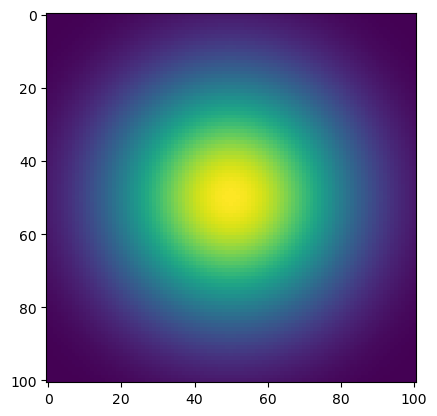

In [72]:
plt.imshow(z, norm=PowerNorm(2)) # I'll vary vmin, vmax, norm here

**Exercise**: Visualize the image in `data`. Give it a colorbar, pick a color map you like, and pick a scaling or normalization that looks good to you.

In [ ]:
# your code here!

**Exercise**: Pick any of the stars in the image and zoom in on it (find approximate coordinates and slice `data` appropriately). Then pick an empty patch of the image and do the same. Using numpy operations (`np.min`, `np.max`, `np.std`, `np.mean`, `np.median`, etc.), come up with a way of describing how much brighter the star is than its background.

In [ ]:
# your code here!